# Семинар 1

**Нейронные сети и Keras: быстрый старт.**

В этом семинаре мы познакомимся с глубоким обучением и обучим полносвязную нейронную сеть.

## **Глубокое машинное обучение**


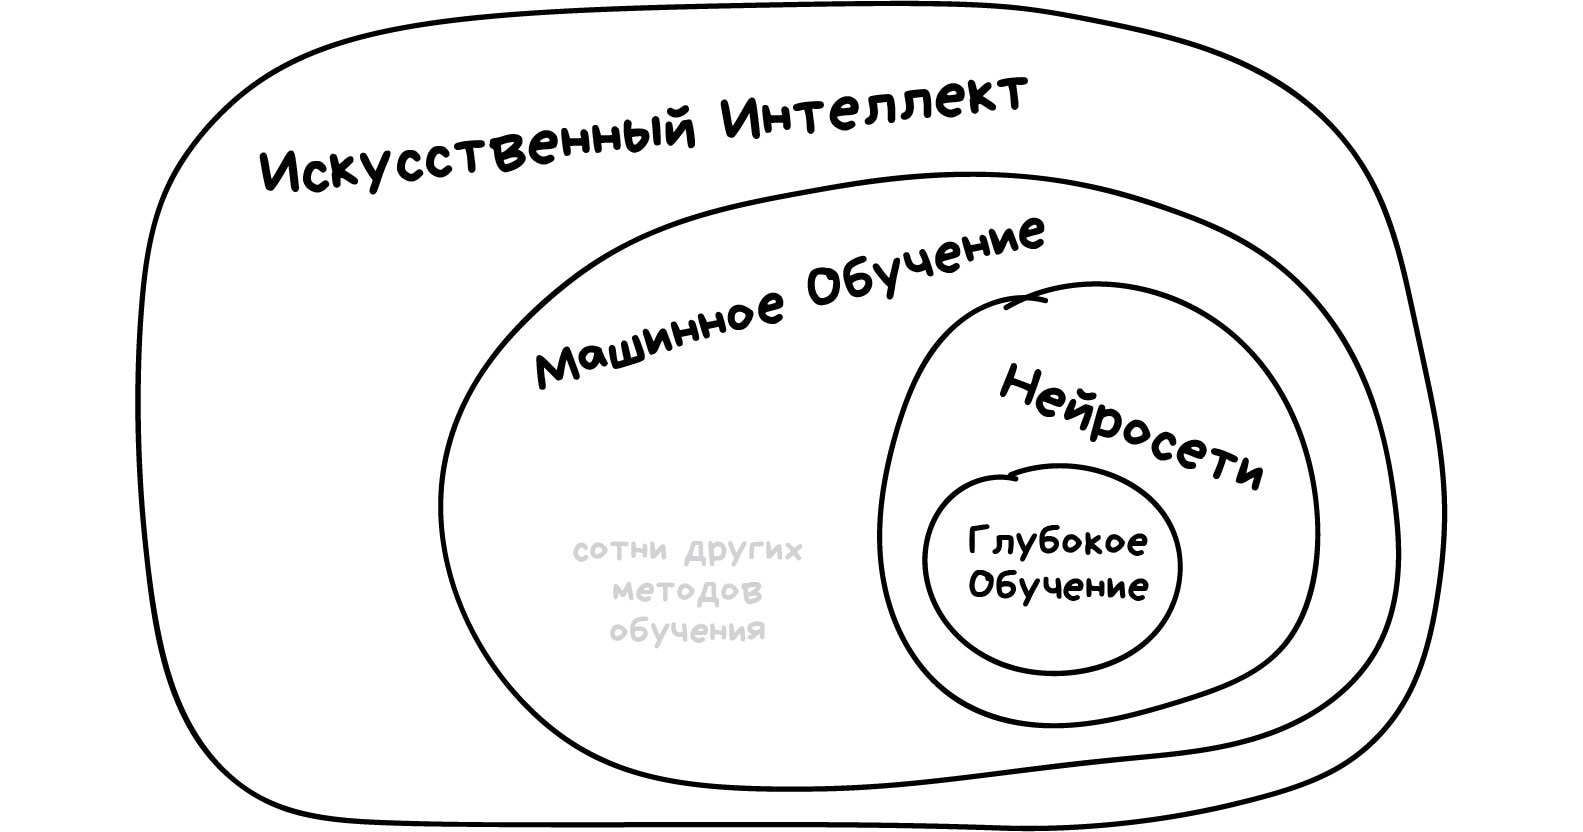

## 1) Что такое нейросеть?

Концепции нейрона, полносвязного слоя, глубокого обучения.
Простейшая нейросеть состоит из **нейронов** - вычислительных узлов.


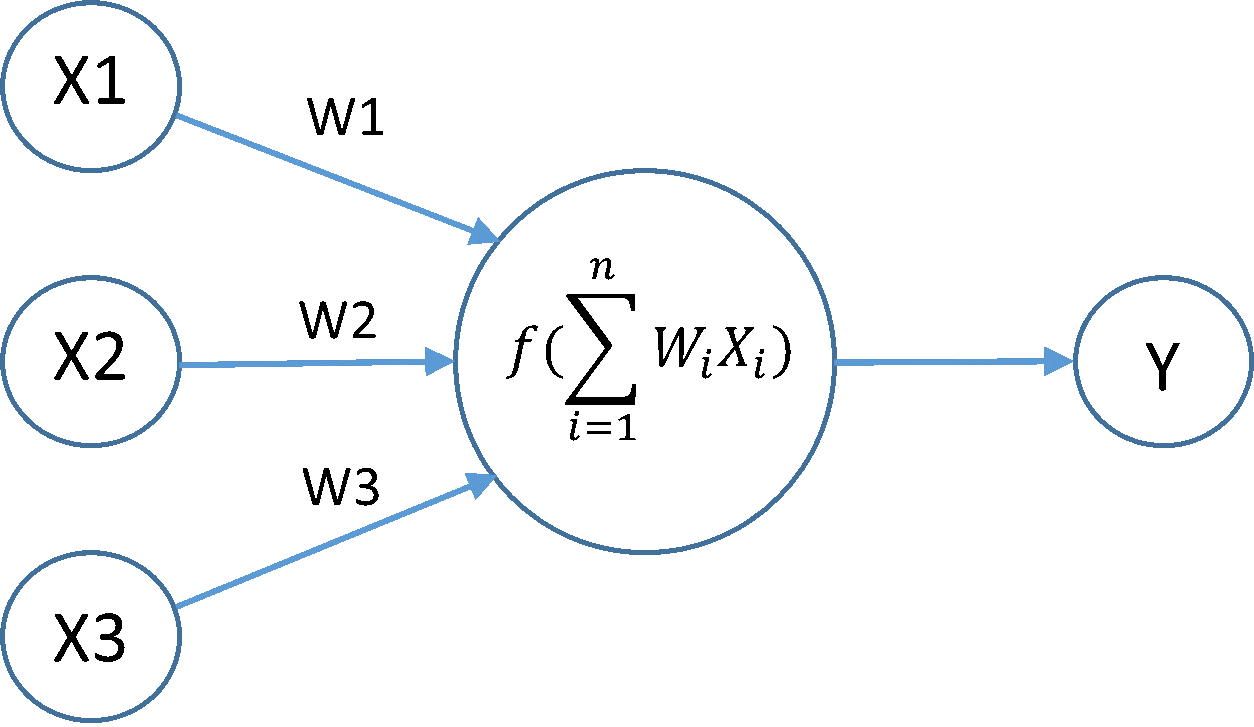

$Y = f(w_1*X_1+w_2*X_2+w_3*X_3)$

Каждый узел принимает на вход численную информацию **input**($X1, X2, X3$), производит над ней некую арифметическую операцию (**$f(\sum_{i=1}^nw_iX_i)$**) и передает результат **output** ($Y$) дальше по сети.

**$w_1, w_2, w_3$** - параметры нейрона, называющиеся **весами**.


Чтобы добавить к поведению нейрона **нелинейность** (а умножение входных данных $X$ на параметры $w$ - линейная операция), то есть усложнить сеть, используются **функции активации** $f$.

**Примеры:**

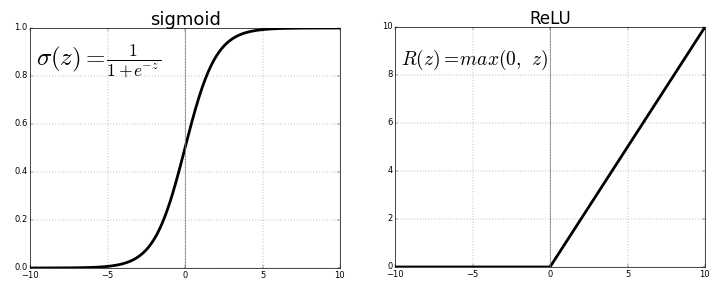

Чтобы оценить поведение нейросети в числах и отразить расхождение между ожидаемым и полученным ответами существуют **функции ошибки**.

**Примеры:**

**Среднеквадратичное отклонение (регрессия):** $MSE(y,\hat{y}) = (y-\hat{y})^2$

**Логистическая функция ошибки (классификация):** $LogLoss(y,\hat{y}) = -y\log(\hat{y})-(1-y)\log(1-\hat{y})$

### Задание 1

Спросите у языковой модели, чем функция потерь отличается от метрики качества модели и в чем идея логистической функции потерь


**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Если вы хотите использовать другую модель, вот ссылки:
- DeepSeek: https://www.deepseek.com/
- GigaChat: https://giga.chat/

Промпт для модели нужно придумать самим.

### Dense Layer (Полносвязный слой)




Нейроны объединяются в слои. Из рассмотренной выше модели нейронов получаются **dense** (полносвязные) слои нейронов: все элементы входных данных связаны с каждым нейроном.

Слои нейронов между входными и выходными данными называются **hidden** (скрытыми) слоями. Чем больше слоев, тем **глубже** нейросеть.





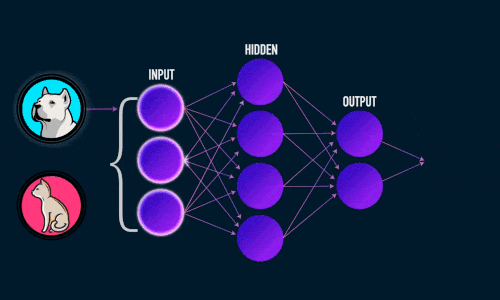

### Глубокое обучение










Совместное обучение большого числа различных слоев нейросети.

*   Нейросеть можно строить из множества "блоков" (слоев), как конструктор
*   Каждый блок может обладать своей архитектурой, независимо вычисляя выходные данные и градиенты.

<table>
<tr>
<td><img src="https://spectrum.ieee.org/image/MjkxMjcwNg.octet-stream" width="300"></td>
<td><img src="https://img.icons8.com/plasticine/2x/arrow.png" width="100"></td>
<td><img src="https://pics.livejournal.com/xotab_81/pic/001zc7aq" width="400"></td>
</tr>


## 2) Библиотека Keras

Основные возможности

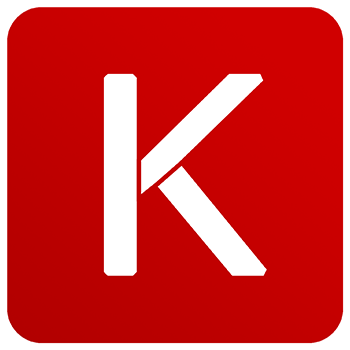

* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей)

* **Keras**  - удобный "пользовательский интерфейс" для более низкоуровневых библиотек (например, TensorFlow)

* Основные принципы:
    1. Удобство использования
    2. Модульность
    3. Масштабируемость
    4. Работа с Python
    
Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.

**keras** - одна из самых популярных библиотек для глубинного обучения
(надстройка над другими библиотеками).

**keras** использует библиотеку **tensorflow** от Google, которая позволяет строить нейронные сети с высокой эффективностью и скоростью.
Именно поэтому сейчас **tensorflow** - одна из наиболее популярных библиотек для глубинного обучения.

## 3) MNIST

Построение нейронной сети для решения задачи классификации рукописных цифр

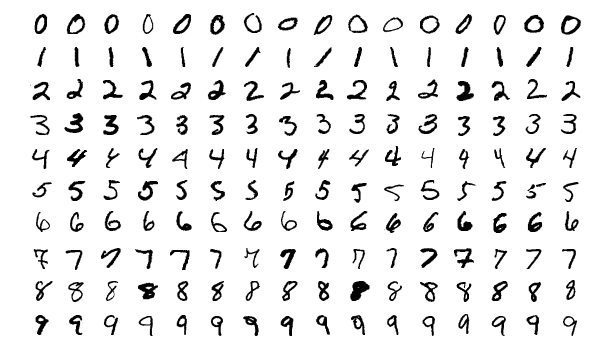

### Нам нужно распознать рукописные цифры по их изображениям.

Так как цифр 10, то в нашей задаче классификации 10 классов.

Наш набор данных MNIST часто используется для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

### Процесс анализа данных:
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестируем модель
6. Попробуем улучшить модель

### Пререквизиты:
* `!pip install numpy`
* `!pip install pandas`
* `!pip install tensorflow`
* `!pip install keras`

Выполните следующую ячейку, нажав `Shift + Enter`. Менеджер пакетов питона `pip` выполнит установку пакетов `numpy`, `pandas`, `tensorflow` и `keras`

In [ ]:
%%capture
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install keras

Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для научных вычислений, `matplotlib` для построения графиков.

* Наша нейронная сеть будет делать ряд последовательных преобразований входных данных, поэтому нам нужен тип нейронных сетей Sequential: импортируем его из раздела `keras.models`.

* Типы преобразований, с которыми мы будем работать: плотный слой Dense, активация Activation, преобразование картинки в длинный вектор Flatten. Каждое преобразование будет отдельным слоем в последовательной модели, поэтому импортируем их из `keras.layers`

Еще мы будем использовать данные MNIST - они тоже лежат прямо в `keras`, как достать этот датасет рассмотрим дальше.

Выполните ячейку ниже:

In [ ]:
# Импортируем сам keras
from tensorflow import keras
# Последовательный тип модели
from tensorflow.keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from tensorflow.keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import tensorflow.keras.datasets

import numpy as np
from matplotlib import pyplot as plt

# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

### Utils

Здесь некоторые дополнительные функции, которые облегчат нам работу с данными (В них разбираться не нужно, только запустить)

In [ ]:
def plot_MNIST_samples_grid(image_data, dataset_name='', N=8):
  """
    Эта функция строит NxN самплов из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape
        (number_of_samples, image_width, image_height, number of channels)
        with images
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Size of grid of samples
  """
  plt.figure(figsize=(10,10))
  data1=image_data[:N*N]

  image_width=image_data.shape[1]
  image_heigth=image_data.shape[2]

  if len(data1.shape)==4:
    image_channels=image_data.shape[3]
    data1 = data1.reshape(N, N,image_width,image_heigth, image_channels)
    data1 = np.transpose(data1,(0,2,1,3,4))
    data1 = data1.reshape(N*image_width,N*image_heigth,image_channels)
    plt.imshow(data1)

  elif len(data1.shape)==3:
    data1 = data1.reshape(N, N,image_width,image_heigth)
    data1 = np.transpose(data1,(0,2,1,3))
    data1 = data1.reshape(N*image_width,N*image_heigth)
    plt.imshow(data1,cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title('First '+ str(N*N) + ' '+dataset_name+ ' samples of training set')
  plt.show()

def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N самплов каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape
        (number_of_samples, image_width, image_height, number of channels)
        with images
    label_data : array
        Array of shape
        (number_of_samples, )
        with labels
    classes : list
        list with classes names
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Number of samples for each class
  """
  plt.figure(figsize=(10,N))
  num_classes = len(classes)
  for i, y in enumerate(classes):
      idxs = np.flatnonzero(label_data == y)
      idxs = np.random.choice(idxs, N, replace=False)
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Эта функция выводит confusion matrix.
    Нормализация может быть добавлена изменением значения флага
    `normalize` на `True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """
    Эта функция показывает 6 картинок с предсказанными и настоящими классами
    """
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)),cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    plt.tight_layout()

### Загрузка данных.

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [ ]:
# Импортируем модуль датасета MNIST
from tensorflow.keras.datasets import mnist

In [ ]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Посмотрим на содержание датасета, вызвав функцию `plot_MNIST_samples`,
которая строит на одной картинке **N** сэмплов из массива картинок
**X_train** для каждого класса

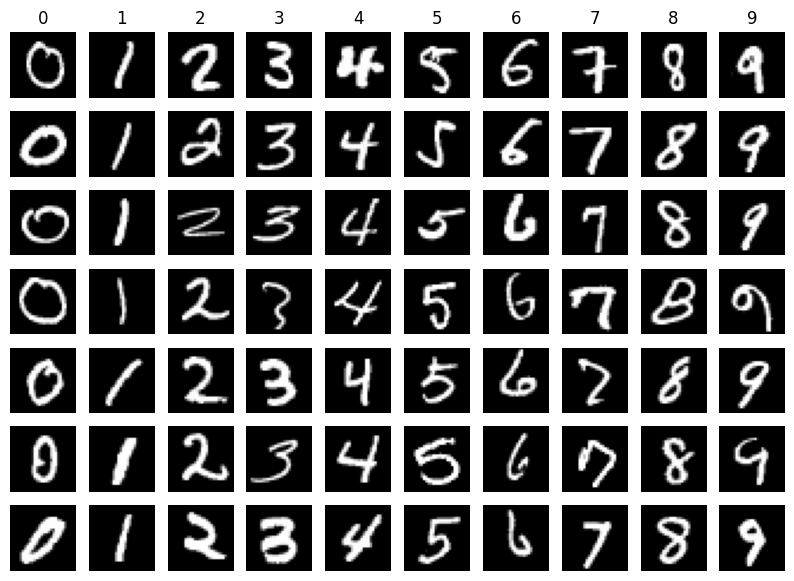

In [ ]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=7)

### Подготовка данных





#### **Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**

Нейронные сети более капризны по сравнению с линейными моделями и моделями на основе решающих деревьев.

Поэтому им нужна предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от $0$ до $1$.

При этом каждый пиксель картинки представлен в виде целого числа от $0$ до $255$ (для черно-белых картинок) и в виде набора из трех целых чисел от $0$ до $255$ для цветных.

Поэтому нормализацию картинки можно произвести простым делением на $255$.





Еще нейронной сети нужно значение выходной переменной в one-hot формате.

Напомним, что такое **one-hot encoding**.

Сейчас наша целевая переменная - цифры от $0$ до $9$, то есть $10$ классов. Для каждой картинки наша сеть будет предсказывать вероятность принадлежности к каждому из этих десяти классов.

Соответственно, истинным значением целевой переменной будет вектор длины $10$, состоящий из девяти $0$ и одной $1$ на месте номера класса, к которому принадлежит картинка (то есть вероятность $1$, что цифра на самом деле принадлежит к конкретному классу).


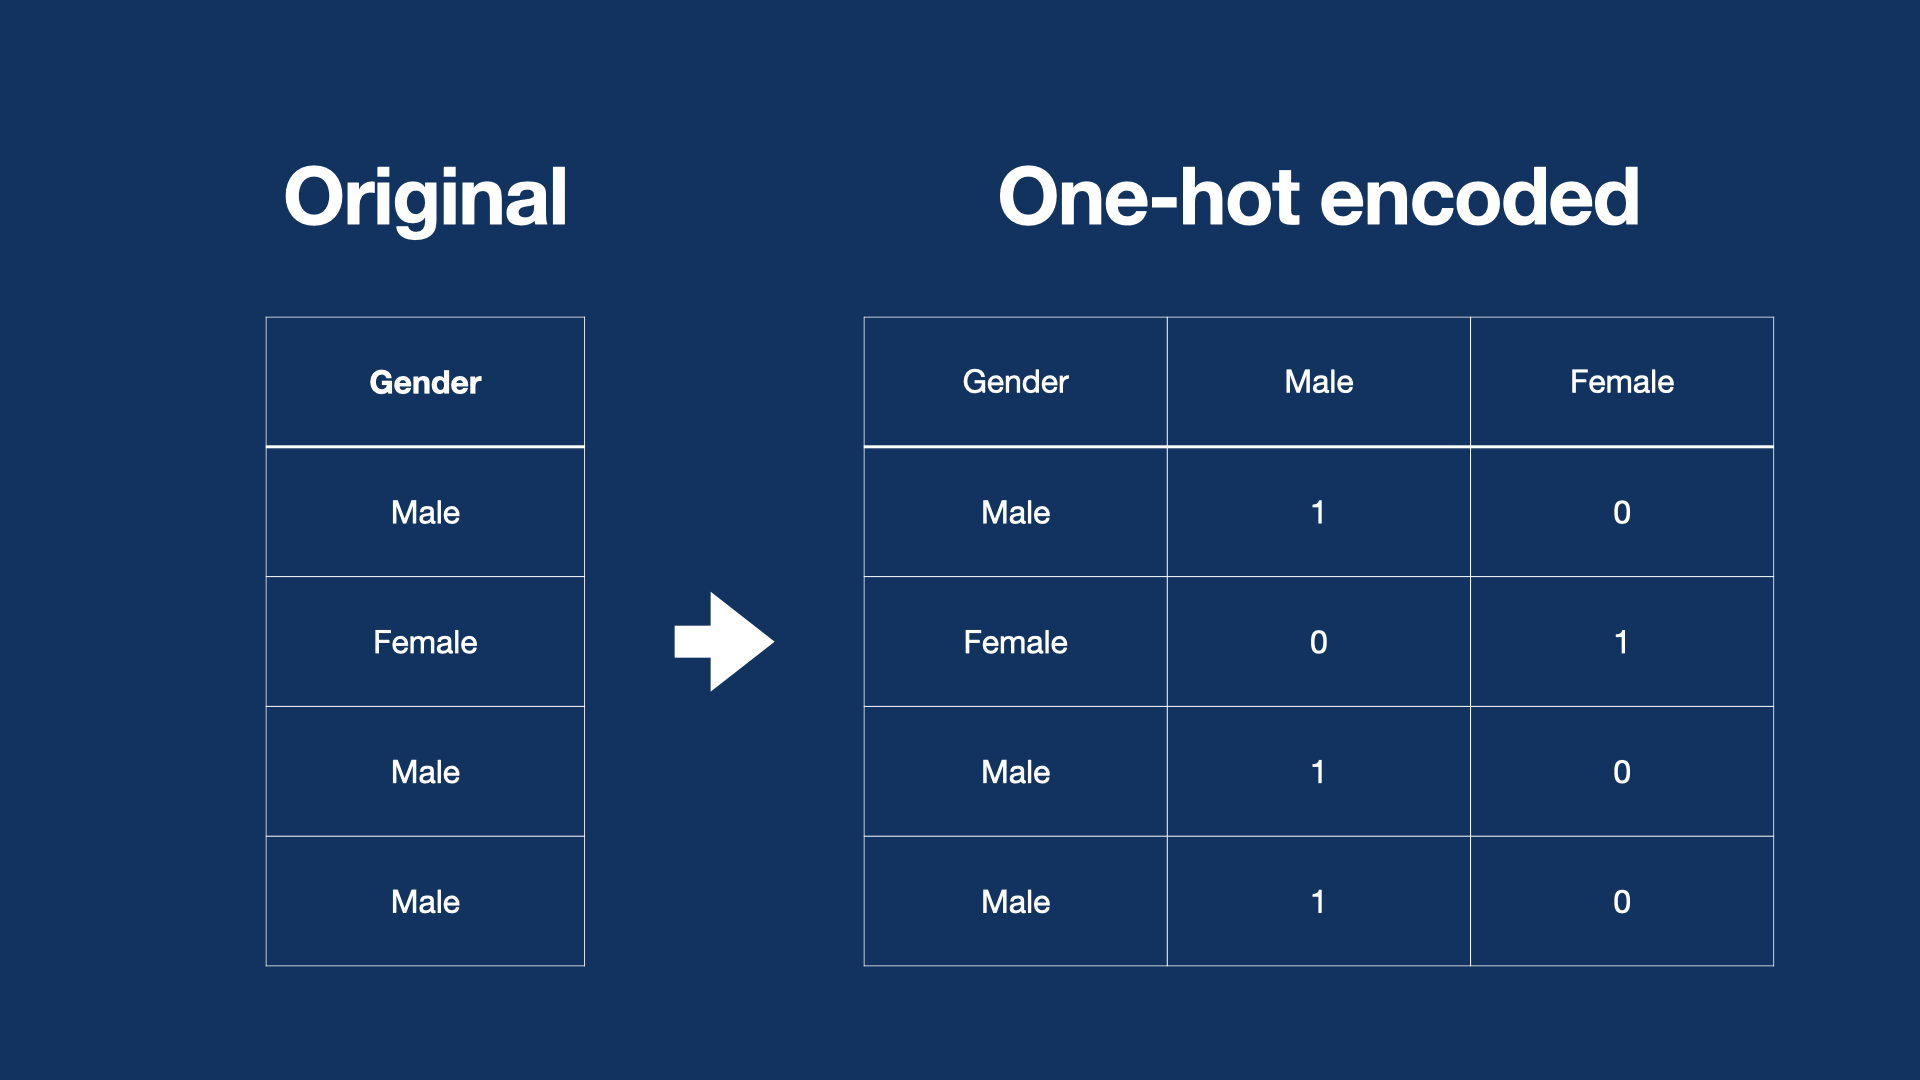

Это делаем функцией из `keras` `keras.utils.to_categorical`, которая принимает на вход исходный вектор значений выходной переменной и число классов.

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

###### Задание 2: нормализуйте значения в обучающей и тестовой выборках

In [ ]:
X_train =  # Ваш код здесь
X_test =   # Ваш код здесь

y_train =  tensorflow.keras.utils.to_categorical(y_train, 10)
y_test =  tensorflow.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки (метод **shape**)

Для данных MNIST это изображения 28 на 28.

In [ ]:
input_size = X_train[0].shape
input_size

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

### Создание модели для обучения `Sequential` - добавляем слои друг за другом

`Sequential` здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [ ]:
# Создаем пустую модель
model = Sequential()

#### Добавляем в модель слой за слоем.

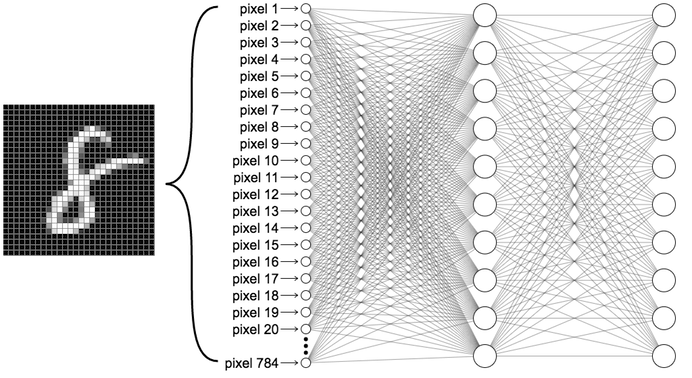

* сначала растягиваем картинку в длинный вектор слоем `Flatten`
* потом идет полносвязный слой - нейроны в следующем слое зависят от всех переменных в предыдущем
* далее используем функцию активации `ReLU`
* потом идет следующий полносвязный слой. В нем $10$ выходов - по числу классов
* в конце используем функцию активации `SoftMax`

**ReLU** - стандартный выбор для функции активации нейронов внутри нейросети. Несмотря на простоту функции, эксперименты показывают, что эта функция активации достаточна для эффективного обучения нейросетей.

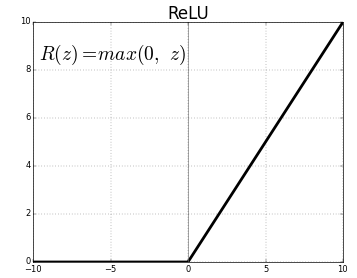

**Softmax** - функция активации для выходного слоя нейронов в задачах классификации с числом классов $>2$. Она переводит выходные значения сети в вероятности принадлежности конкретного элемента выборки к одному из классов.

*Важно: в первом слое `Sequential` модели keras необходимо указать размерность входных данных $28*28=784$ ; перед активацией softmax делаем плотный выходной слой с размерностью $10$ по числу классов*

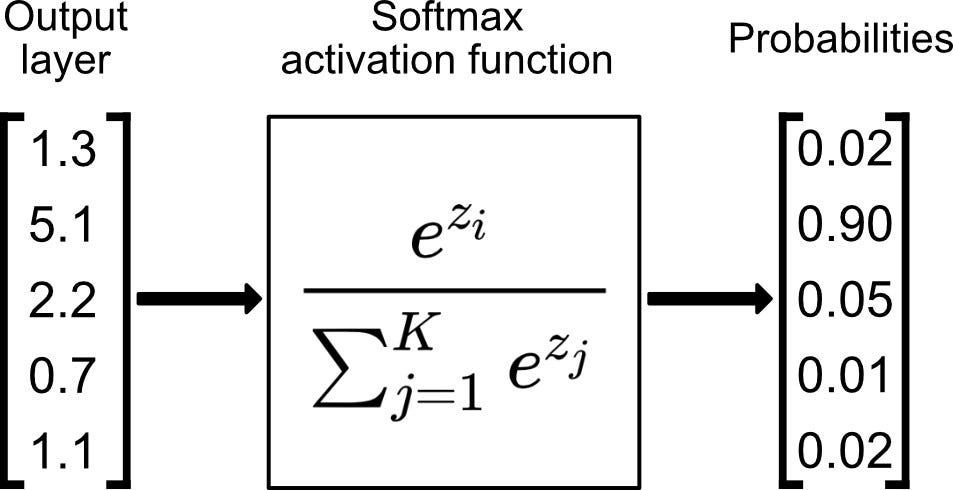

In [ ]:
# Этот слой превратит нашу двумерную картинку в вектор
model.add(Flatten(input_shape=input_size))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128, input_shape=input_size))
# И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 10 нейронов
model.add(Dense(units=10))
# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

NameError: name 'input_size' is not defined

После описания архитектуры необходимо скомпилировать модель при помощи метода `compile`, указав минимизируемую функцию потерь (параметр `loss`),
оптимизатор (параметр `optimizer`, который позаботится об изменении весов модели) и метрику (параметр `metrics`), по которой будет оцениваться точность работы на тестовой выборке в процессе обучения

In [ ]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4) Обучение нейросети

**Обучение** нейросети - изменение **весов** нейронов при помощи метода обратного распространения ошибки

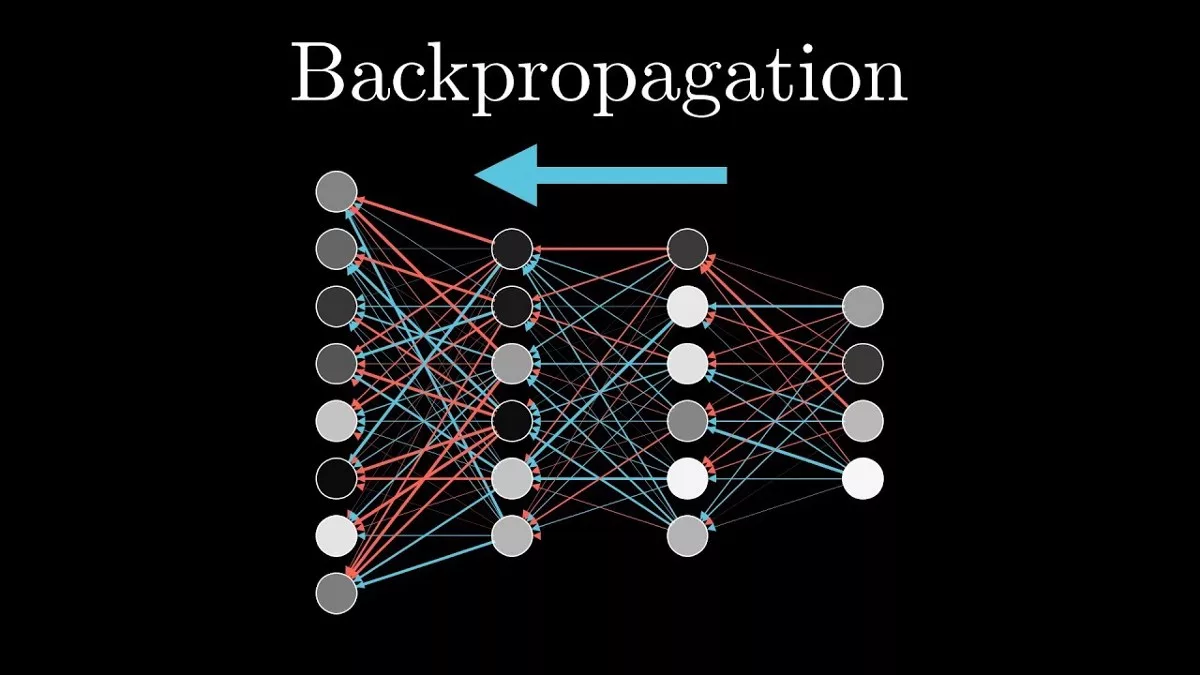

### **Тренировка с указанием данных, числа эпох и размера подвыборки**

Теперь задана структура модели и то, как мы будем ее обучать.
Обучаем ее аналогично `sklearn` - с помощью метода `fit`.

После запуска `fit` параметры оптимизируются градиентным спуском.
На каждом шаге градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.



### Два дополнительных параметра для обучения - batch_size и epochs
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

[Эксперименты](https://arxiv.org/abs/1609.04836) показывают, что выбор **batch_size** в диапазоне $32-512$ в среднем обеспечивает нормальную обобщающую способность нейросети, то есть помогает модели делать лучшие предсказания на новых данных, не присутствующих в тренировочной выборке.

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке не начала ухудшаться (то есть, не произошло переобучения).

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

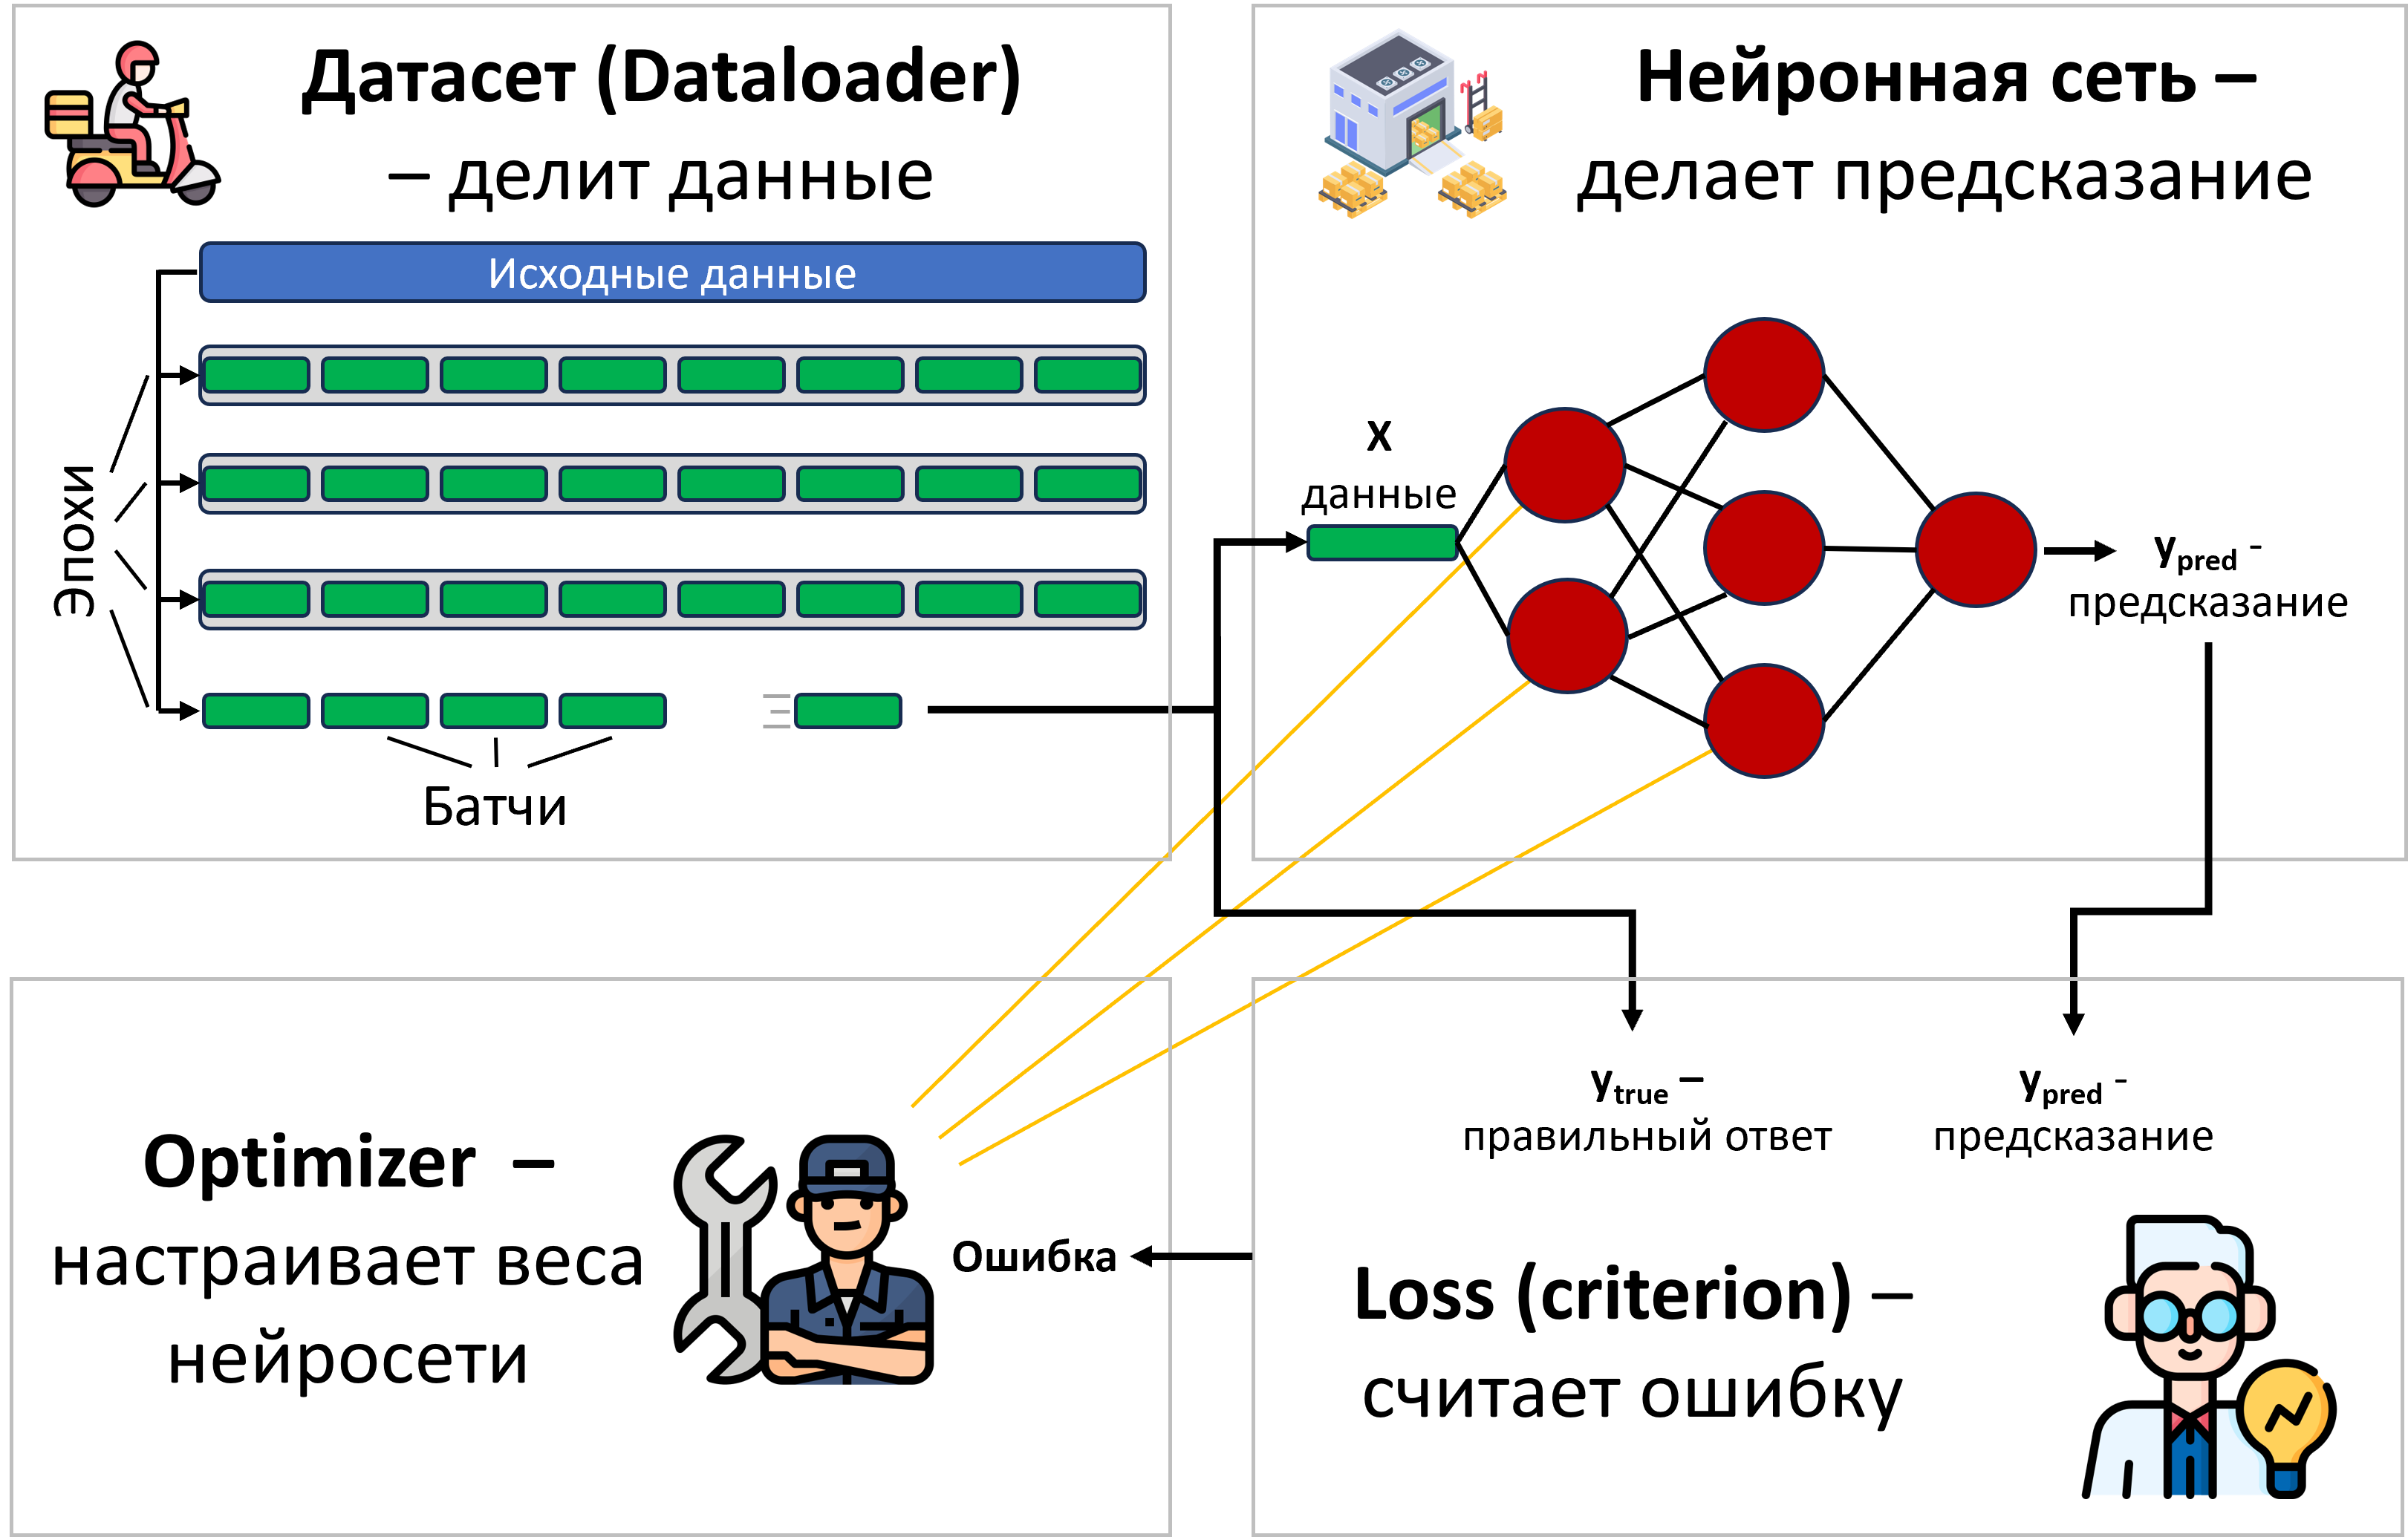

##### Задание 3

Напишите код для обучения нейронной сети на библиотеке `keras`. Модель необходимо обучать 5 эпох и указать размер батча 64.


**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Если вы хотите использовать другую модель, вот ссылки:
- DeepSeek: https://www.deepseek.com/
- GigaChat: https://giga.chat/

Промпт для модели нужно придумать самим.

In [ ]:
# Ваш код здесь


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8514 - loss: 0.5150
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9584 - loss: 0.1473
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9713 - loss: 0.0977
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9793 - loss: 0.0722
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9843 - loss: 0.0543


### Валидация качества модели на тестовых данных.
Протестируем модель на тестовой выборке для этого используется метод `evaluate`.
Выводится **loss** и **точность**.

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9725 - loss: 0.1005


[0.08418331295251846, 0.9760000109672546]

### Задание.Попробуйте поменять архитектуру (размер слоев) нейронной сети и параметры обучения чтобы добиться лучшего результата

Что это означает: для нашей модели на основе нейронной сети мы получаем точность 98% - то есть, с вероятностью 98% модель определяет, какая цифра нарисована на картинке.

### Сохранение весов модели

Обучение современных глубоких нейронных сетей может занимать большое время: часы, дни и даже месяцы. Поэтому веса обученной модели - это ценный ресурс, который можно сохранять, передавать и использовать в дальнейшем.

Для сохранения и загрузки весов в keras есть специальные методы, которые мы покажем в примере ниже.

In [ ]:
# сохрение весов keras-модели
model.save("simple_model.keras")

# загрузка весов keras-модели
model.load_weights("simple_model.keras")

Обратите внимание, что в данном примере веса модели сохранились в локальную среду google colab'а, и они удалятся при перезапуске ноутбука. Однако веса можно также сохранить на google диск, локальный компьютер, либо сервер.

## Выводы





1.   Мы познакомились с **нейросетями** и основными терминами - **нейрон**, **слои**, **функция активации**, **функция ошибки (loss)**, **обучение/тренировка**, **батч**, **эпоха**...

2.   Начали учиться работать с библиотекой для "дрессировки" нейронных сетей **`keras`**

3. Узнали, из чего состоит **полносвязная нейронная сеть**.

4.   На примере одного из самых популярных датасетов черно-белых картинок **MNIST** посмотрели, как строить нейросети для задачи **классификации**

5.  Разобрали **гиперпараметры** обучения нейронной сети
